In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [142]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {response.status_code}")

In [143]:
download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

In [144]:
df = pd.read_csv("module_5_auto.csv", header =0)

In [145]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [146]:
#Using only numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [147]:
#Removing Unnecessary data
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1, inplace=True)

In [148]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [149]:
#Importing libraries for plotting
%pip install micropip
import micropip
micropip.install(['ipywidgets'],keep_going = True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [150]:
#Making a function for plotting

def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title):
    width = 12
    height =10
    plt.figure(figsize=(width,height))

    ax1 = sns.kdeplot(RedFunction, color = 'r', label = RedName)
    ax2 = sns.kdeplot(BlueFunction,color= 'b',label =BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price in $')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [67]:
#Making a function for Training , testing data

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    
    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [13]:
#Training and Testing actual dataset

#Splitting data and storing price in y_data 
y_data = df['price']

#Dropping price from x_data
x_data = df.drop('price', axis =1)

In [15]:
#Splitting data into Training and Testing dataset 

from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_data,y_data ,test_size=0.10,random_state =1)
print("Number of test sample:", x_test.shape[0])
print("Number of training sample:", x_train.shape[0])

Number of test sample: 21
Number of training sample: 180


In [18]:
x_train1 , x_test1, y_train1,y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)
print("Number of test samples:", x_test1.shape[0])
print("Number of training samples:", x_train1.shape[0])

Number of test samples: 81
Number of training samples: 120


In [20]:
#Importing LinearRegression 

from sklearn.linear_model import LinearRegression

lre = LinearRegression()

0.6619724197515103

In [21]:
#Fit model using horsepower
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [22]:
#Calculating R-SQUARED on test data
lre.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [23]:
#Calculating R-SQUARED on training data
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size =0.4, random_state = 0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.fit(x_test1[['horsepower']],y_test1)

LinearRegression()

In [27]:
#Finding Cross-validation score using Model_selection in sklearn

from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre,x_data[['horsepower']], y_data,cv =4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [28]:
#Calculation Average and std deviation 
print("Mean of folds are:", Rcross.mean(),"and standard deviation is:", Rcross.std())

Mean of folds are: 0.5220099150421194 and standard deviation is: 0.2911839444756025


In [29]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [37]:
#Calculating R-SQUARED, R-Squared avg using 2 fold

Rc2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print("The R-squared is:" ,Rc2)
print("The mean R-Squared is:",Rc2.mean())

The R-squared is: [0.59015621 0.44319613]
The mean R-Squared is: 0.5166761697127429


In [38]:
#Using cross_val_predict to predict output - Function split in folds for testing and trainig
from sklearn.model_selection import cross_val_predict

In [39]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [40]:
#Plotting MLR of  'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features and learning Overfitting, Underfitting, Model-Selection

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [41]:
#Predictoin using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [42]:
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [43]:
#Model-Evaluation using Test and Train data seprately

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

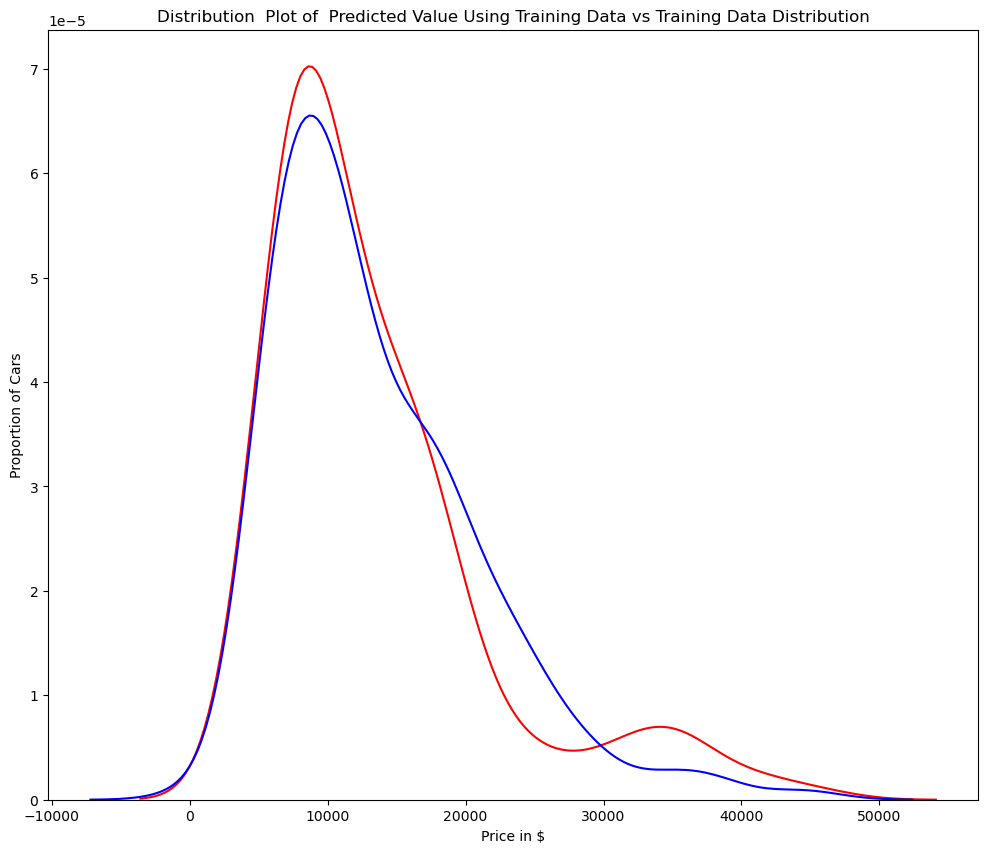

In [47]:
#Examine distribution of predicted values of Training-data

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

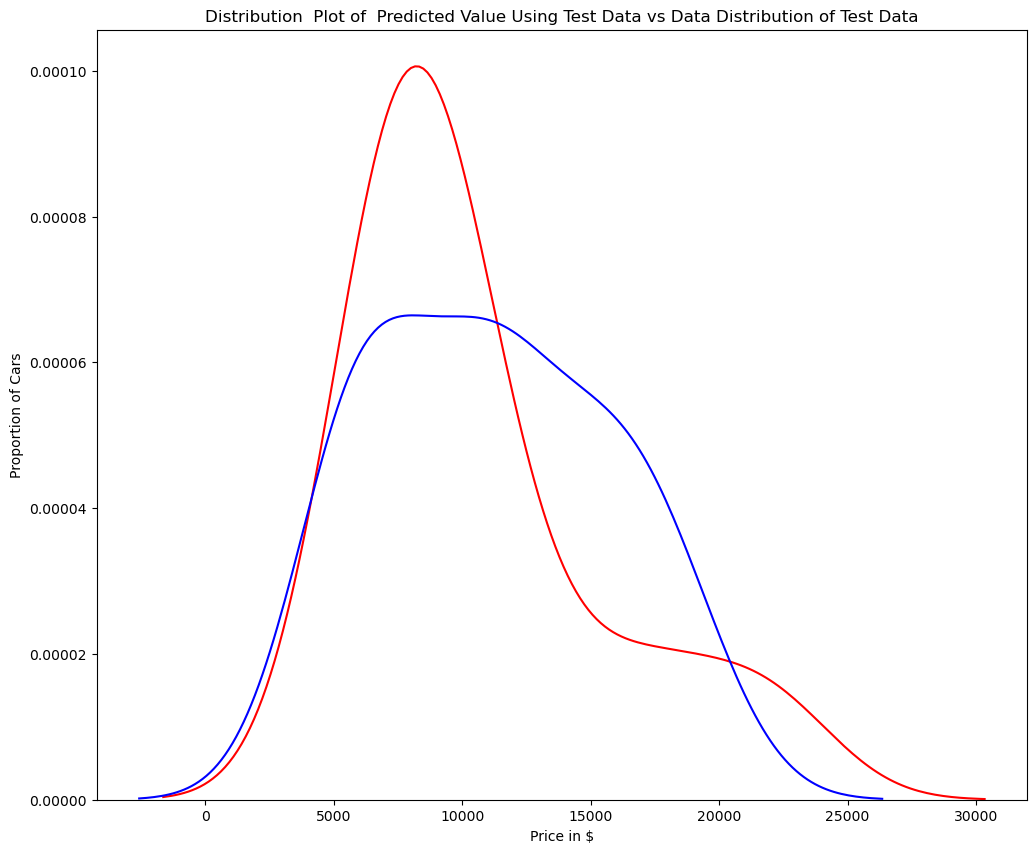

In [49]:
#After model generates new values from test-data 

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

#The distribution of predicted vlaues is much more different from the actual target vlaues

In [50]:
#Trying Polynomidal-Regression to see accuracy of test data

from sklearn.preprocessing import PolynomialFeatures

In [51]:
#Using 55% of data for training and rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [57]:
#Perform degree 5 polynomial transformation on horsepower
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr= pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [72]:
#Creating Linear-Regression and training it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [73]:
#Output of model using predict
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

In [74]:
#First 5 predicted values and comparing it to target
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
True values: [ 6295. 10698. 13860. 13499.]


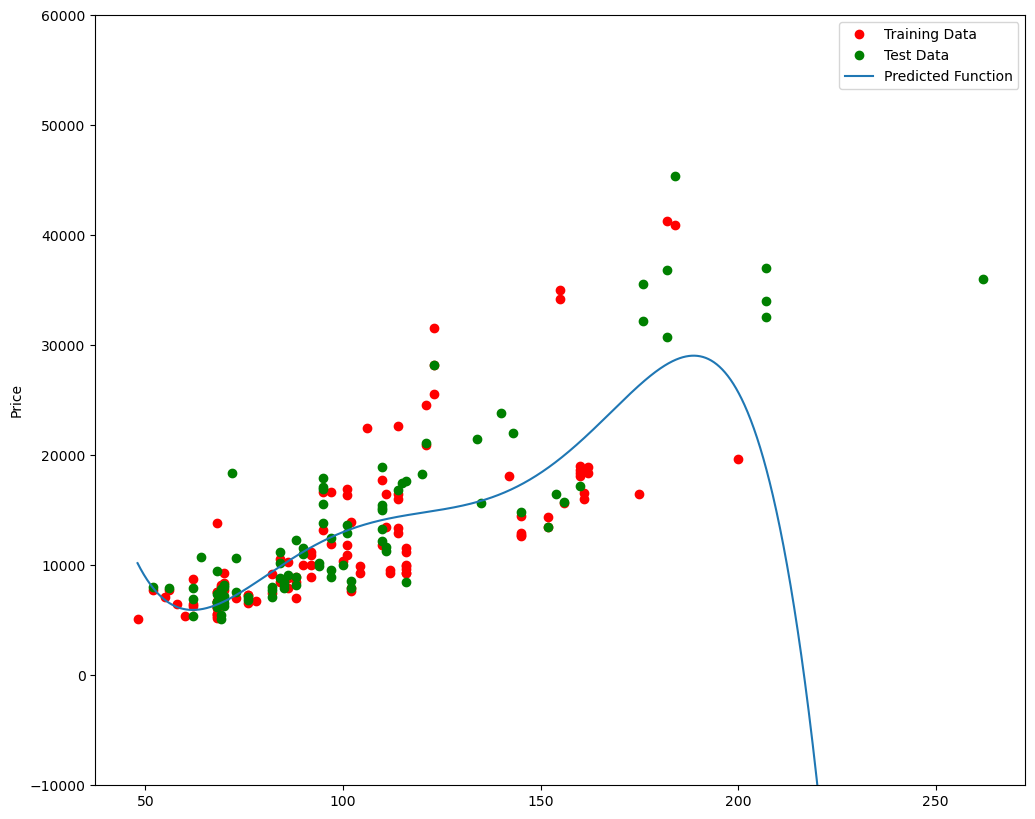

In [79]:
#Using PollyPlot to display training, testing data and predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)
plt.show()

In [76]:
#Calculating R-SQUARED of training data
poly.score(x_train_pr, y_train)

0.5567716902028981

In [77]:
#Calulating R-SQUARED of test data
poly.score(x_test_pr, y_test)

-29.871621329672777

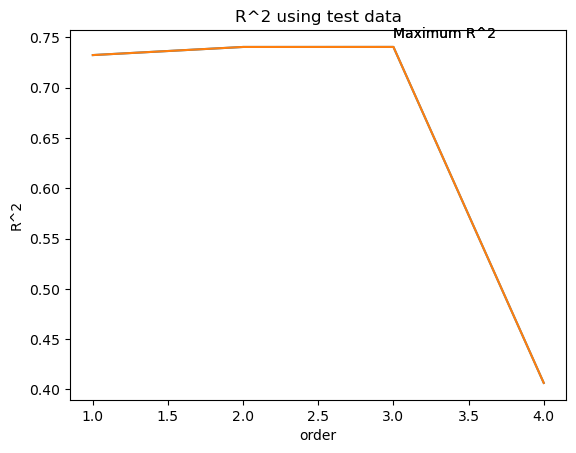

In [81]:
Rsqu_test=[]

order= [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3,0.75,'Maximum R^2')
plt.show()

In [82]:
#A function which will let us interact with different polynomial orders and different amount of data 
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)
    plt.show()

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

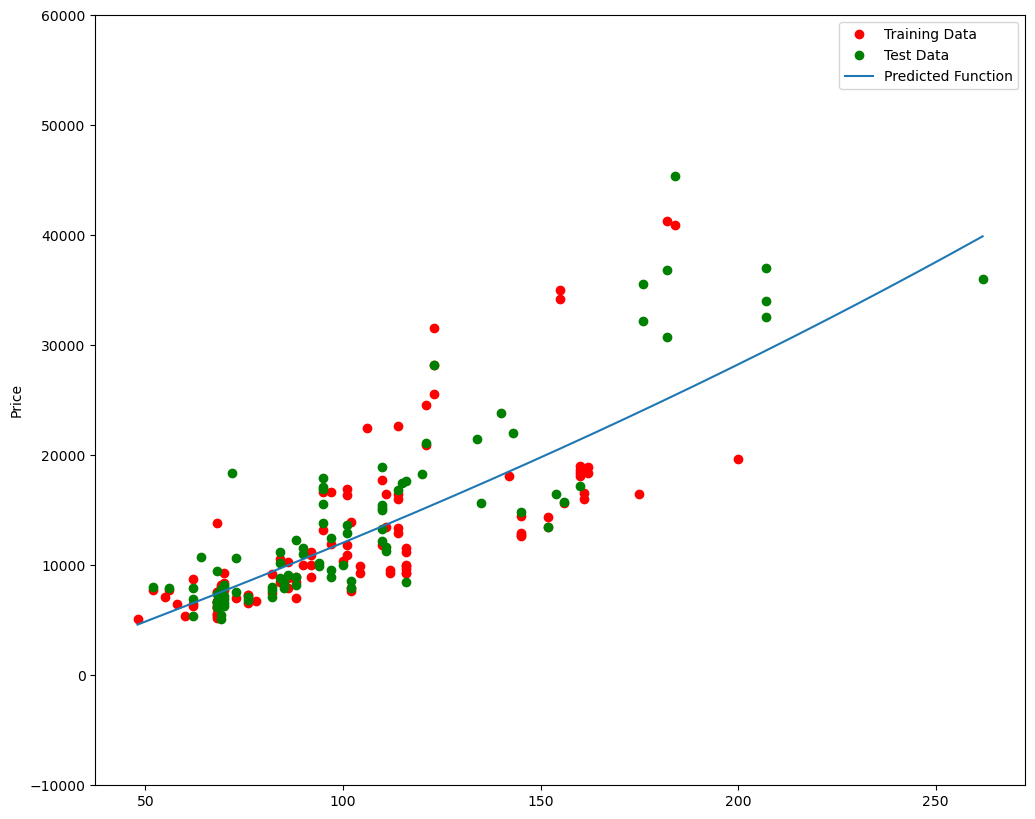

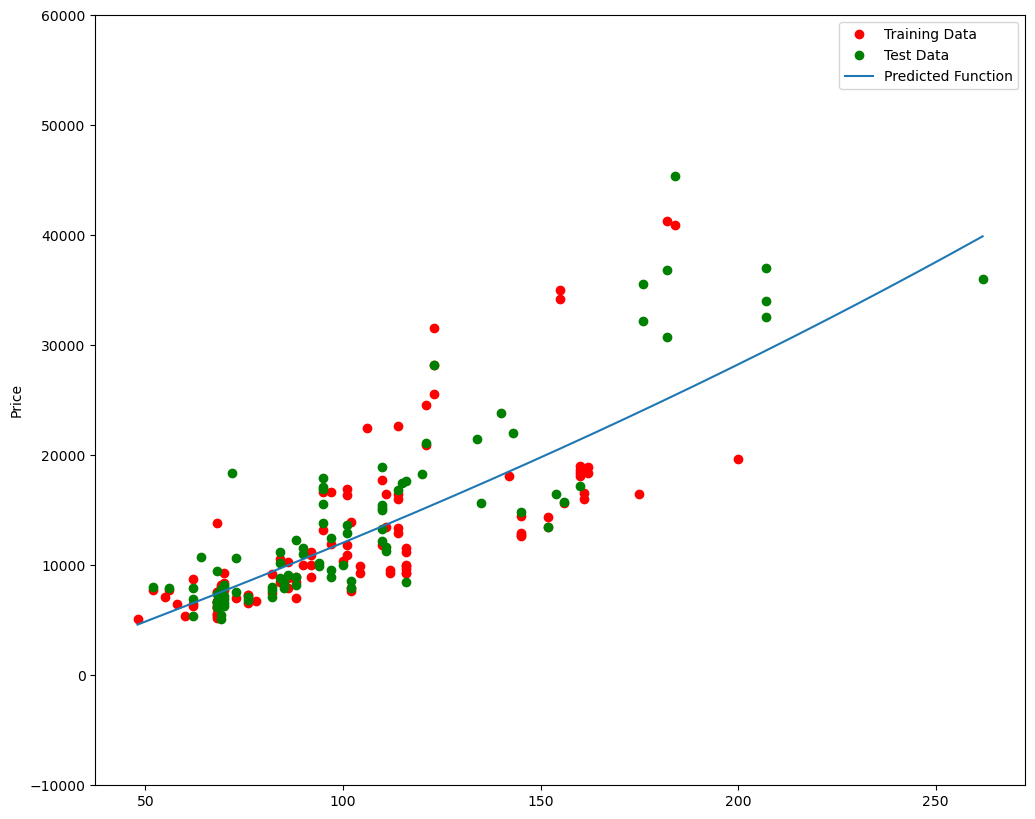

In [98]:
interact(f, order=(0, 6, 1), 
test_data=(0.05, 0.95, 0.05))
plt.show()

In [100]:
#Creating a polynomial transformation of degree 2
pr1= PolynomialFeatures(degree=2)

In [101]:
#Creating Testing and Training data for different features
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])

In [102]:
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [104]:
x_train_pr1.shape

(110, 15)

In [105]:
#Creating Linear Regression Model using polynomial feature, for poly1 and training object using fit
poly1= LinearRegression().fit(x_train_pr1,y_train)

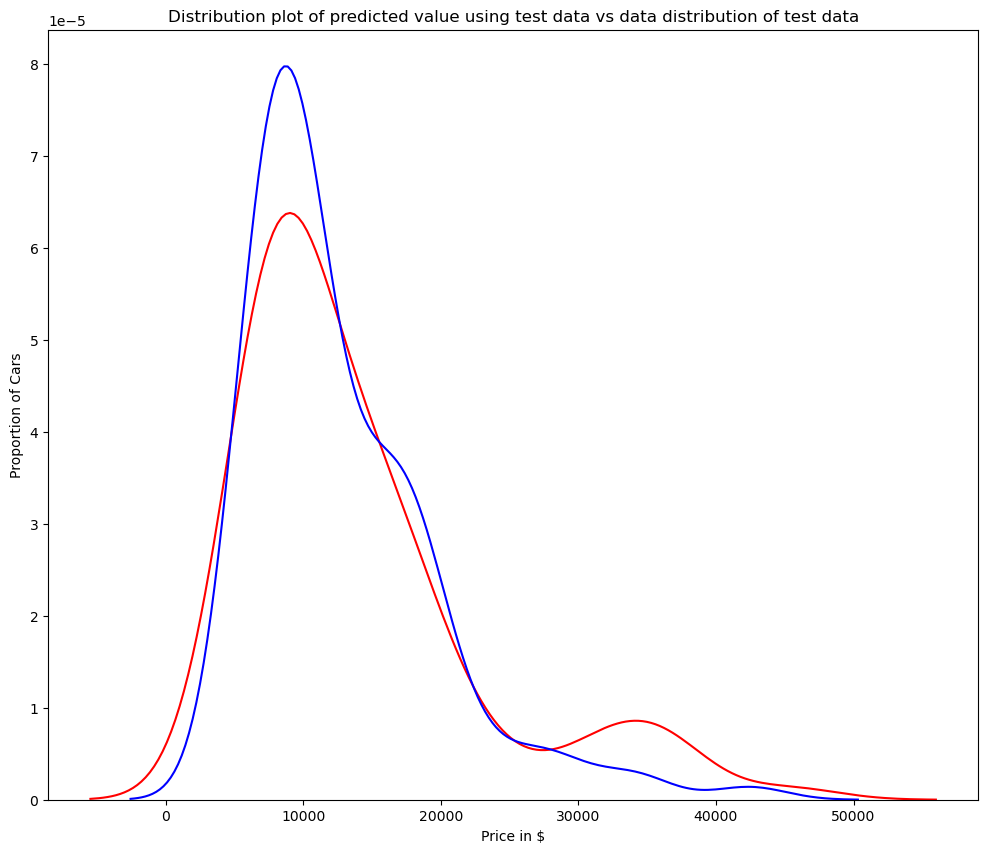

In [112]:
#Predict output for polynomial features and plotting predicted output vs actual data
yhat_test1 = poly1.predict(x_train_pr1)

Title = 'Distribution plot of predicted value using test data vs data distribution of test data'
DistributionPlot(y_test,yhat_test1,"Actual Values(Test)", "Predicted values(test)", Title)

In [113]:
#The above model is not accurate for prices in 10k$ range and the 30k-40k$ range 

In [114]:
#Ridge Regression - how alpha changes model

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [115]:
from sklearn.linear_model import Ridge

In [116]:
#Creating a Ridge-Regression where alpha = 0.1
RigeModel=Ridge(alpha=1)

In [117]:
#Fitting the model
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [118]:
#Obtaining a prediction
yhat = RigeModel.predict(x_test_pr)

In [119]:
#Compare the predicted values to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [120]:
#Selecting a value that minimizes test error , also creating a progress bar to se how many iteration we have completed so far

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.46it/s, Test Score=0.564, Train Score=0.859]


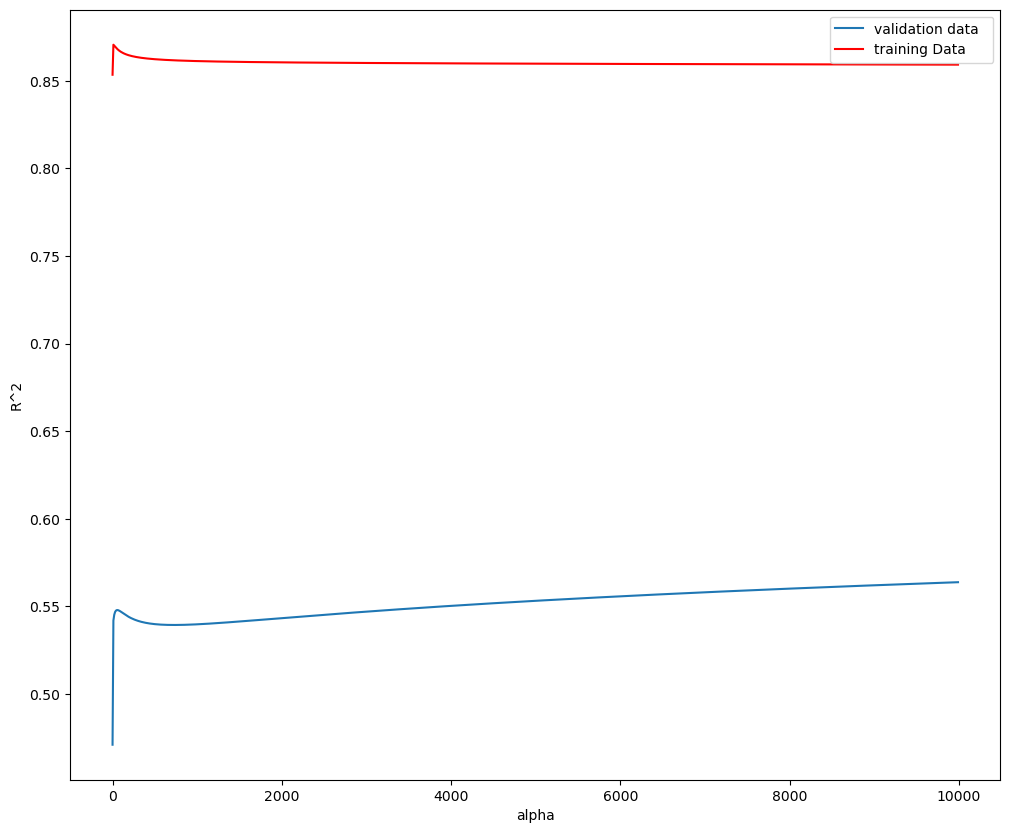

In [123]:
#Plotting a graph for value of R-SQUARED

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [130]:
#Calculating R-SQUARED using polynomial features w/parameter = 10

RidgeModel = Ridge(alpha=10)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

0.5418576440207336

In [131]:
#Grid-Search - hyperparameter which makes process of finding best hyperparameter simple

from sklearn.model_selection import GridSearchCV

In [132]:
#Creating dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [134]:
#Creating Ridge grid search
RR=Ridge()
RR

Ridge()

In [135]:
#Ridge grid object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [136]:
#Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [137]:
#Object finds best parameter on validation data, we obtain estimator w/best parameter
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [138]:
#Testing model on test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [140]:
#Performing Grid search to find best alpha value and check if scaling improves model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower','curb-weight','engine-size','highway-mpg']])

#Defining parameter 
parameter2 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

Grid2= GridSearchCV(Ridge(),parameter2,cv=4)
Grid2.fit(x_scaled,y_data)

best_ridge_model = Grid2.best_estimator_
best_alpha = Grid2.best_params_['alpha']
best_alpha

100